In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import joblib
import pandas as pd
import numpy as np



In [63]:
class Perceptron:
    def __init__(self, eta, epochs) -> None:
        self.weights = np.random.randn(3)*1e-4
        print(f"initial weights before training : {self.weights}")
        self.eta = eta
        self.epochs = epochs
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)  #z = weight * input
        return np.where(z>0, 1,0 )
    def fit(self, x, y):
        self.x = x
        self.y = y
        x_with_bias = np.c_[self.x, -np.ones((len(self.x), 1))]
        print(f'x with bias: {x_with_bias}')
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch : {epoch}")
            print('--'*10)

            y_hat = self.activationFunction(x_with_bias, self.weights) #forward propogation
            print(f"predicated value after forward pass: {y_hat}")
            self.error = self.y - y_hat
            print(f"error: {self.error}")
            self.weights = self.weights + self.eta * np.dot(x_with_bias.T, self.error) #backward propogation
            print(f"updated weights after epoch: {epoch}/{self.epochs} : {self.weights}")
            print('#####'*10)
             
    def predict(self, x):
        x_with_bias = np.c_[x, -np.ones((len(x), 1))]
        return self.activationFunction(x_with_bias, self.weights)
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"total loss : {total_loss}")
        return total_loss

In [64]:
def prepare_data(df):
    x = df.drop('y', axis=1)
    y = df['y']
    return x,y

In [65]:
AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1],

}
df = pd.DataFrame(AND)

In [66]:
print(df)

   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1


In [67]:
x,y = prepare_data(df)
print(x)
print()
print(y)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

0    0
1    0
2    0
3    1
Name: y, dtype: int64


In [68]:
ETA = 0.3
EPOCHS = 10
model = Perceptron(eta = ETA, epochs = EPOCHS)
model.fit(x,y)f

initial weights before training : [-7.21225708e-05 -1.04583284e-04  1.91814195e-05]
x with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch : 0
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 0/10 : [ 0.29992788  0.29989542 -0.29998082]
##################################################
--------------------
for epoch : 1
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10 : [-7.21225708e-05 -1.04583284e-04  6.00019181e-01]
##################################################
--------------------
for epoch : 2
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10 : [0.29992788 0.29989542 0.30001918]
#############################

In [69]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 0])

In [70]:
import os

In [100]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  filePath = os.path.join(model_dir, filename) # model/filename
  joblib.dump(model, filePath)

In [75]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df = pd.DataFrame(OR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [76]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()


initial weights before training : [-2.39310271e-04 -1.61045985e-04 -6.85673057e-05]
x with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch : 0
--------------------
predicated value after forward pass: [1 0 0 0]
error: 0   -1
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 0/10 : [ 0.59976069  0.59983895 -0.60006857]
##################################################
--------------------
for epoch : 1
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10 : [ 0.59976069  0.59983895 -0.30006857]
##################################################
--------------------
for epoch : 2
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10 : [ 5.99760690e-01  5.99838954e-01 -6.85673057e-05]
##########################

In [102]:
save_model(model_OR, "or_model")

In [73]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])  # type: ignore

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  plotPath = os.path.join(plot_dir, file_name) # model/filename
  plt.savefig(plotPath)

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


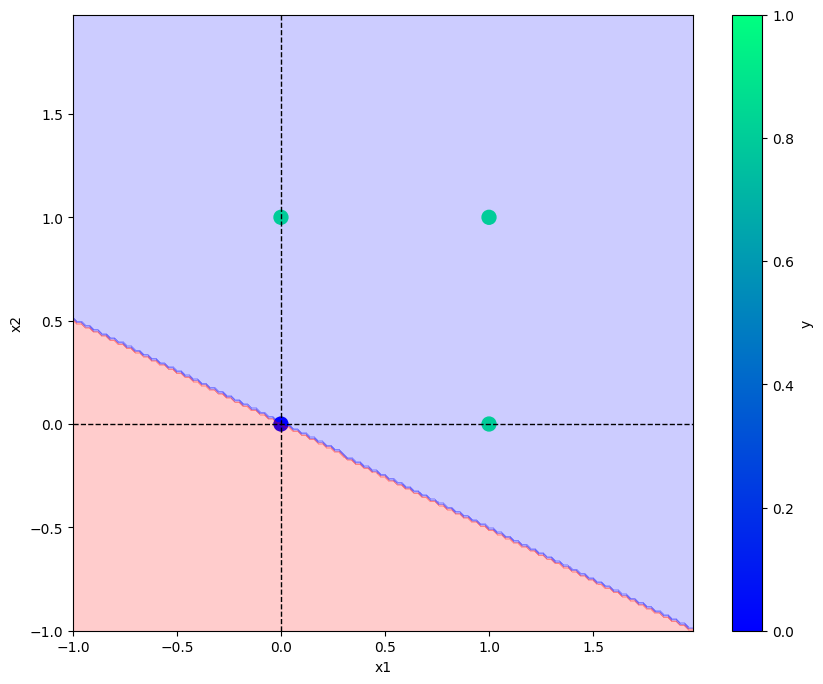

In [101]:
save_plot(df2, "or.png", or_model)

In [78]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [80]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()


initial weights before training : [-2.03130059e-05  1.05107150e-04 -6.56769782e-05]
x with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch : 0
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10 : [-0.30002031 -0.29989489  0.89993432]
##################################################
--------------------
for epoch : 1
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10 : [-2.03130059e-05  1.05107150e-04  5.99934323e-01]
##################################################
--------------------
for epoch : 2
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10 : [0.29997969 0.30010511 0.29993432]
#############################

In [104]:
save_model(model_AND, "and_model")

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


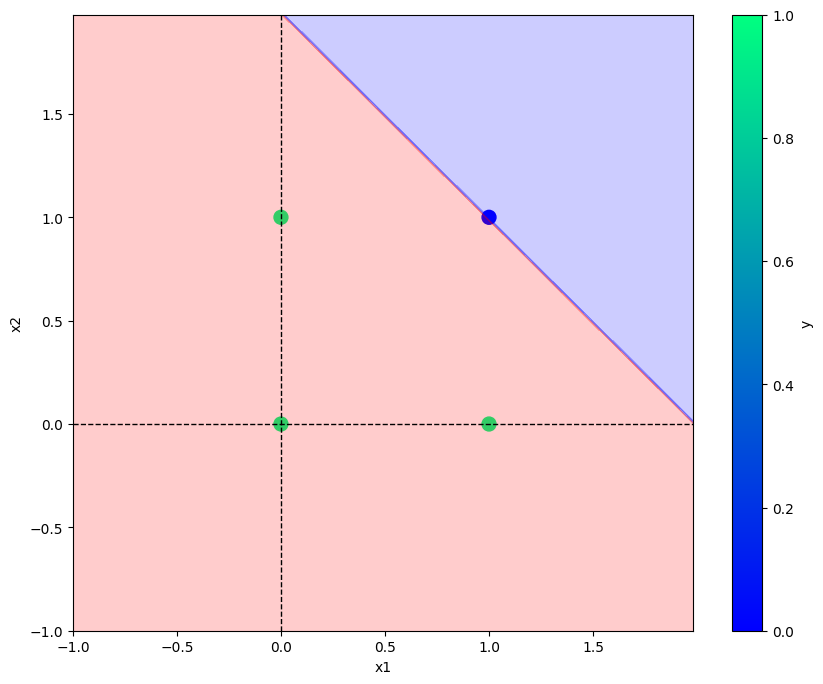

In [103]:
save_plot(df, "and.png", model_AND)


In [82]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [83]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()


initial weights before training : [-1.03693184e-04 -4.96960618e-07  2.21752781e-05]
x with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch : 0
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10 : [ 0.29989631  0.2999995  -0.59997782]
##################################################
--------------------
for epoch : 1
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10 : [-1.03693184e-04 -4.96960618e-07  2.21752781e-05]
##################################################
--------------------
for epoch : 2
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10 : [ 0.29989631  0.2999995  -0.59997782]
##########################

In [105]:
save_model(model_XOR, "xor_model")

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


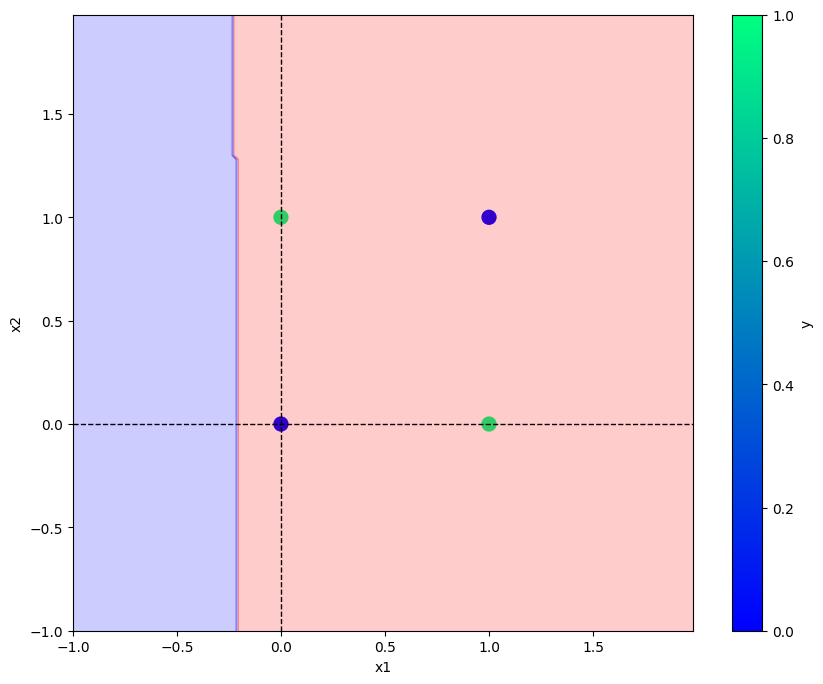

In [84]:
save_plot(df, "xor.png", model_XOR)


In [85]:
NAND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [1,1,1,0],
}

df = pd.DataFrame(NAND)

df

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [86]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_NAND = Perceptron(eta=ETA, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()


initial weights before training : [ 4.21355744e-05 -1.60076958e-05  8.14383143e-05]
x with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch : 0
--------------------
predicated value after forward pass: [0 0 0 0]
error: 0    1
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10 : [ 0.30004214  0.29998399 -0.89991856]
##################################################
--------------------
for epoch : 1
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10 : [ 4.21355744e-05 -1.60076958e-05 -5.99918562e-01]
##################################################
--------------------
for epoch : 2
--------------------
predicated value after forward pass: [1 1 1 1]
error: 0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10 : [-0.29995786 -0.30001601 -0.29991856]
##########################

In [106]:
save_model(model_NAND, "nand_model")

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


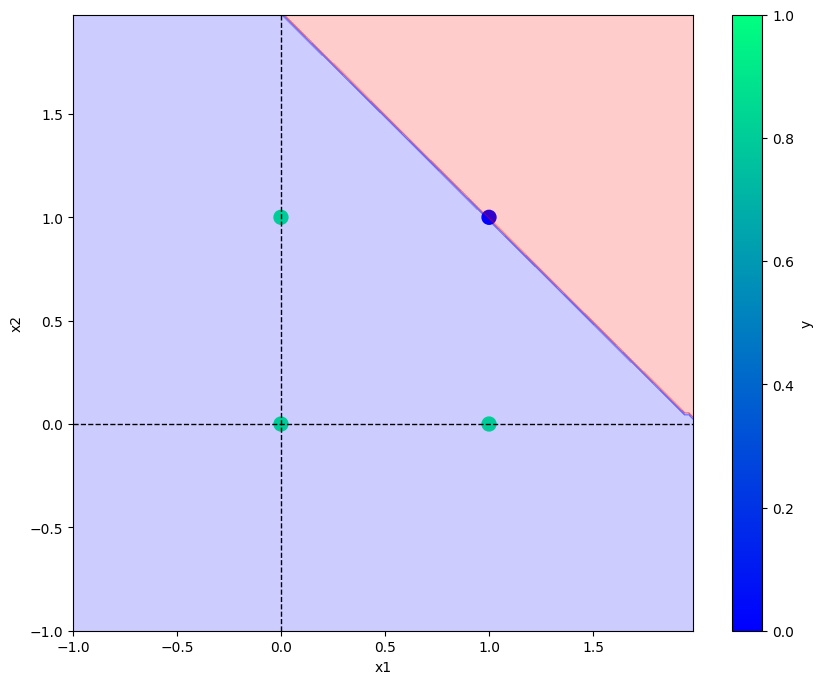

In [87]:
save_plot(df, "nand.png", model_NAND)